<a href="https://colab.research.google.com/github/DanielaNavaGarcia/Ecuaciones-Diferenciales-Parciales-I/blob/main/Sturm_Liouville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valores propios k para condición dirichlet:
  k_1 = pi**2


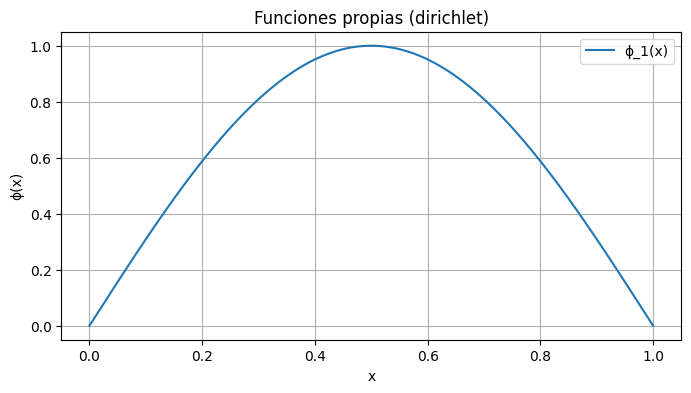

Valores propios k para condición neumann:
  k_1 = pi**2


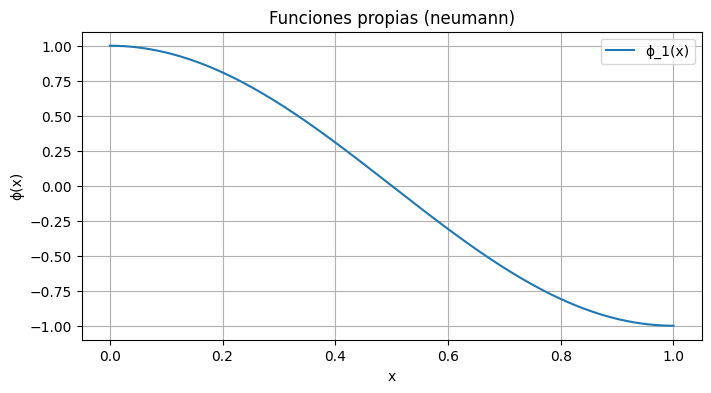

In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Definir variable simbólica
x, k = sp.symbols('x k', real=True)
X = sp.Function('X')

# Ecuación diferencial
ode = sp.Eq(X(x).diff(x, 2) + k * X(x), 0)

# Solución general
X_general = sp.dsolve(ode, X(x)).rhs
C1, C2 = sp.symbols('C1 C2')

def resolver_sturm_liouville(tipo='dirichlet'):
    # Reescribir la solución general
    C1, C2 = sp.symbols('C1 C2')
    sol = C1 * sp.sin(sp.sqrt(k)*x) + C2 * sp.cos(sp.sqrt(k)*x)

    # Condiciones de frontera
    if tipo == 'dirichlet':
        condiciones = [sp.Eq(sol.subs(x, 0), 0), sp.Eq(sol.subs(x, 1), 0)]
    elif tipo == 'neumann':
        dsol = sp.diff(sol, x)
        condiciones = [sp.Eq(dsol.subs(x, 0), 0), sp.Eq(dsol.subs(x, 1), 0)]
    else:
        raise ValueError("Tipo no reconocido")

    # Resolver sistema para C1 y C2
    sistema = sp.linear_eq_to_matrix(condiciones, [C1, C2])
    matriz = sistema[0].applyfunc(sp.simplify)

    # Calcular el determinante (condición para no-trivialidad)
    det = matriz.det()

    # Encontrar los valores de k para los cuales el determinante es 0
    kn_solutions = sp.solve(det, k)

    # Extraer soluciones físicas (reales y positivas)
    kn_fisicos = [sp.simplify(sol) for sol in kn_solutions if sol.is_real and sol > 0]

    print(f"Valores propios k para condición {tipo}:")
    for i, val in enumerate(kn_fisicos):
        print(f"  k_{i+1} =", val)

    # Mostrar algunas funciones propias (con C1 = 1, C2 = 0 o viceversa)
    funciones_propias = []
    for k_val in kn_fisicos[:3]:  # solo graficamos las 3 primeras
        expr = sol.subs(k, k_val)
        expr = expr.subs({C1: 1, C2: 0}) if tipo == 'dirichlet' else expr.subs({C1: 0, C2: 1})
        funciones_propias.append(sp.simplify(expr))

    return funciones_propias

# Resolver y graficar
tipos = ['dirichlet', 'neumann']
x_vals = np.linspace(0, 1, 400)

for tipo in tipos:
    funciones = resolver_sturm_liouville(tipo)
    plt.figure(figsize=(8, 4))
    for i, fx in enumerate(funciones):
        fx_lambd = sp.lambdify(x, fx, 'numpy')
        plt.plot(x_vals, fx_lambd(x_vals), label=f'ϕ_{i+1}(x)')
    plt.title(f'Funciones propias ({tipo})')
    plt.xlabel('x')
    plt.ylabel('ϕ(x)')
    plt.grid(True)
    plt.legend()
    plt.show()
